# Predicting Housing Prices

## Introduction
In the "House Sales in King County, USA" dataset obtained from Kaggle, we used pairwise scatterplots to identify the variables that exhibit a linear correlation with home price. Through linear regression, we derived the equation: House Price = -$595,222 + ($172 * living room size) + ($113,983 * grade) - ($40,663 * number of bathrooms). The equation reveals that the construction and design score (grade) had the most significant impact on house prices in 2015. Contrary to our expectations, according to the generated model, an increase in the number of bathrooms is associated with a lower house price. Subsequently, after obtaining the model, we computed RMSPE by applying the model to the testing data, resulting in an RMSPE value of $230,593. Finally, we overlaid the predictions on top of the actual home values to visualize the model's accuracy. By undergoing this regression analysis, we found that the more bathrooms within a home, the lower the price of a house. 

This was different from what we expected to find as, intuitively, we assumed a higher number of bathrooms within a home would increase the home price. However, there could have been errors within our model. Firstly, it has a large RMSPE of $230k, negatively affecting the model's accuracy. This means that, on average, our model predictions deviate by an error of $230K. With an average home price of $517k, this model has room for improvement. This can be attributed to the fact that other factors, in addition to living room size, design, construction rating, and number of bathrooms, may affect the price of homes. Factors such as the neighborhood a house is located in, the number of floors in a home, the year the home was built, existing appliances within the home, and the housing market during the data recording time could also affect house prices. There could also have been outliers within the data that negatively influenced our linear regression model. For example, in Figure 5, a home was valued at just under $3,000,000, but our model predicted $1,400,000 based on our variables. This outlier significantly increases the calculated RMSPE. Finally, interest rates also have several impacts on the housing market, especially on house prices. According to the data from the FRED website (2023), the interest rate in the United States has been rising gradually every year, which is associated with increased housing prices. For example, an increasing trend in interest rates causes borrowing money for loans to be less affordable. This reduces the desire to purchase homes due to lower demand because of decreased affordability for buyers, potentially exerting downward pressure on house prices. This impact on housing prices based on fluctuating interest rates can also have effects inversely over various years collected in our used dataset. Considering these influences, we can consider the interest rate as a factor in the fluctuation of house prices.

Buyers can use the linear regression model we created to estimate the potential impact of specific features on house prices, and sellers may focus on improving the construction, design score, and living room size to increase the perceived value of their property. The linear regression model does a sufficient job of rationalizing which aspects of houses impact their value. Similar to how we could not hypothesize a trend, showing the 'House Sales in King County' dataset highlights potential influential factors in housing sales. In real estate investment, investors can use this information to identify the undervalued properties based on the factors included in the model. However, it is essential to be aware of the model's limitations: the equation may only capture some relevant factors influencing house prices. This model could be further modified to capture critical factors when influencing prices. Overall, the findings of this study have unveiled various differently weighted influences on house pricing. Using this model reveals the impact of these factors, capturing the tangible summation of a house's value in King County.

As shown from the results and the possibilities this model could have within this topic, many future questions are asked. Firstly, future questions regarding the model method designed and their accuracies with the given data are crucial. What results would be found if we had used different regression models? For example, whether using the k-nearest neighbors regression model would provide more accurate results. Secondly, questions based on the model's results to identify what truly impacts a house's value can lead to more explanation in the real estate field. Determining what factors are most significant in helping predict the price of a home and figuring out their relative importance are further questions to explore. This can be done by using different data columns instead of the number of bathrooms, living room size, and construction and design rating to examine different combinations of factors. Also, standardizing data with inflation discrepancies over multiple years and creating a flat-pierced market within our model may affect the data. 


##### price - Price of each home sold

##### bedrooms - Number of bedrooms

##### bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

##### sqft_living - Square footage of the apartments interior living space

##### sqft_lot - Square footage of the land space

##### floors - Number of floors

##### waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

##### view - An index from 0 to 4 of how good the view of the property was
##### condition - An index from 1 to 5 on the condition of the apartment,

##### grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of 
##### construction and design.

##### sqft_above - The square footage of the interior housing space that is above ground level

##### sqft_basement - The square footage of the interior housing space that is below ground level

##### yr_built - The year the house was initially built

##### yr_renovated - The year of the house’s last renovation

## Methods and Results

In [1]:
#please run this cell for correct packages
library(tidyverse)
library(tidymodels)
library(dbplyr)
install.packages("gridExtra")
library(gridExtra)
install.packages("GGally")
library(GGally)
install.packages("kknn")
library(kknn)
options(scipen = 999, digits = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

First we will begin by loading the data and plotting the variables to determine if there are any correlations with price

price   bedrooms bathrooms sqft_living sqft_lot floors waterfront view
1  769000 4        2.5       2440         6733    2.0    0          0   
2  360000 3        1.0       1280         3870    1.0    0          0   
3  695000 5        2.0       3160         3990    1.5    0          0   
4 1150000 4        3.0       4160        13170    2.0    0          0   
5  424950 2        1.5       1000         1188    3.0    0          0   
  condition grade sqft_above sqft_basement yr_built yr_renovated
1 3          9    2440          0          1999     0           
2 3          7     640        640          1945     0           
3 3          7    1870       1290          1923     0           
4 3         11    3040       1120          2001     0           
5 3          8    1000          0          2005     0

Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”
Warning message in cor(x, y):
“the standard deviation is zero”


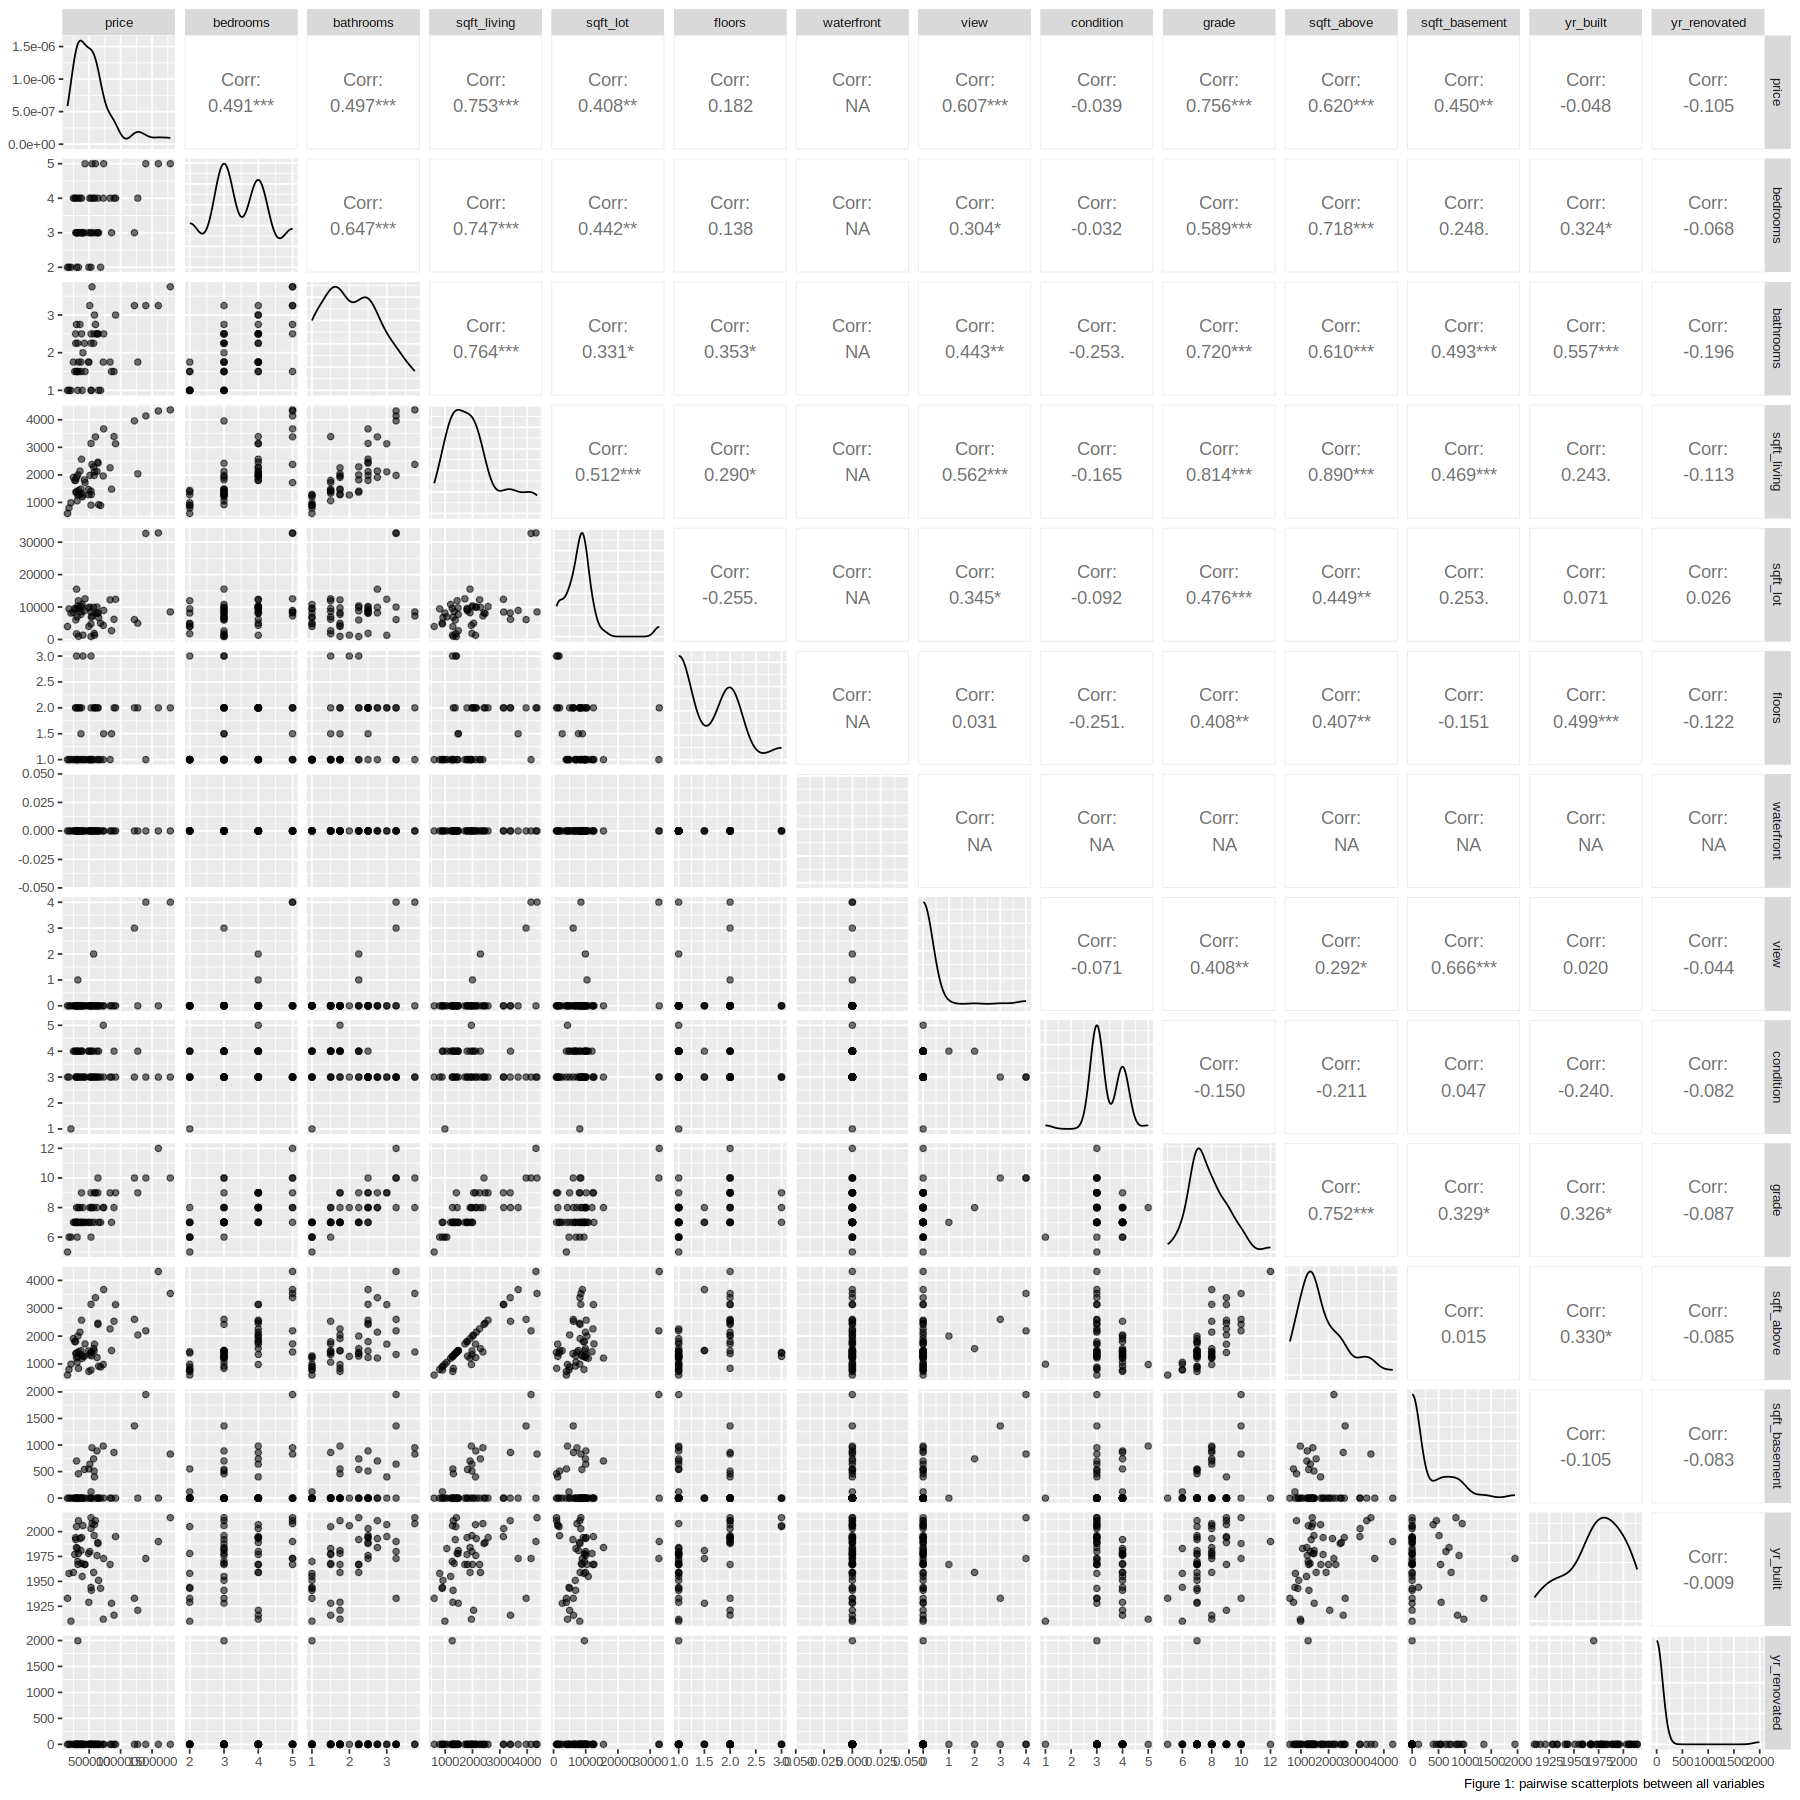

In [2]:
#Run to load data and observe correlations
options(repr.plot.width=15, repr.plot.height=15)
url <- "https://raw.githubusercontent.com/Moe-Jala/dsci-100-group-003-7/main/kc_house_data.csv"
housing_data <- read_csv(url, show_col_type = FALSE)|>
    filter(price < 3000000, sqft_lot<40000, date > as.POSIXct("2014-12-31")) |> #removing possible outliers
    select(price:yr_renovated)
    sample_n(housing_data, 5)

#using ggpairs() to create pairwise scatterplots between all variables
housing_pairs <- housing_data|>
    sample_n(50) |>
    ggpairs(aes(alpha = 0.05))+
    labs(caption = "Figure 1: pairwise scatterplots between all variables") + #add figure number for the pairwise scatterplots
    theme(text = element_text(size=10))
housing_pairs


<br>
<br>

Based on our data correlation coefficients, we see that the variable most connected to price are living room size, number of bathrooms, and construction and design. The observed correlations intuitively align with logical expectations of factors that influence the price of a home. To further visualize these correltions, we will graph a close up look of a sample with an easily distinguishable trendline.

<br>

List of 1
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 0.5
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

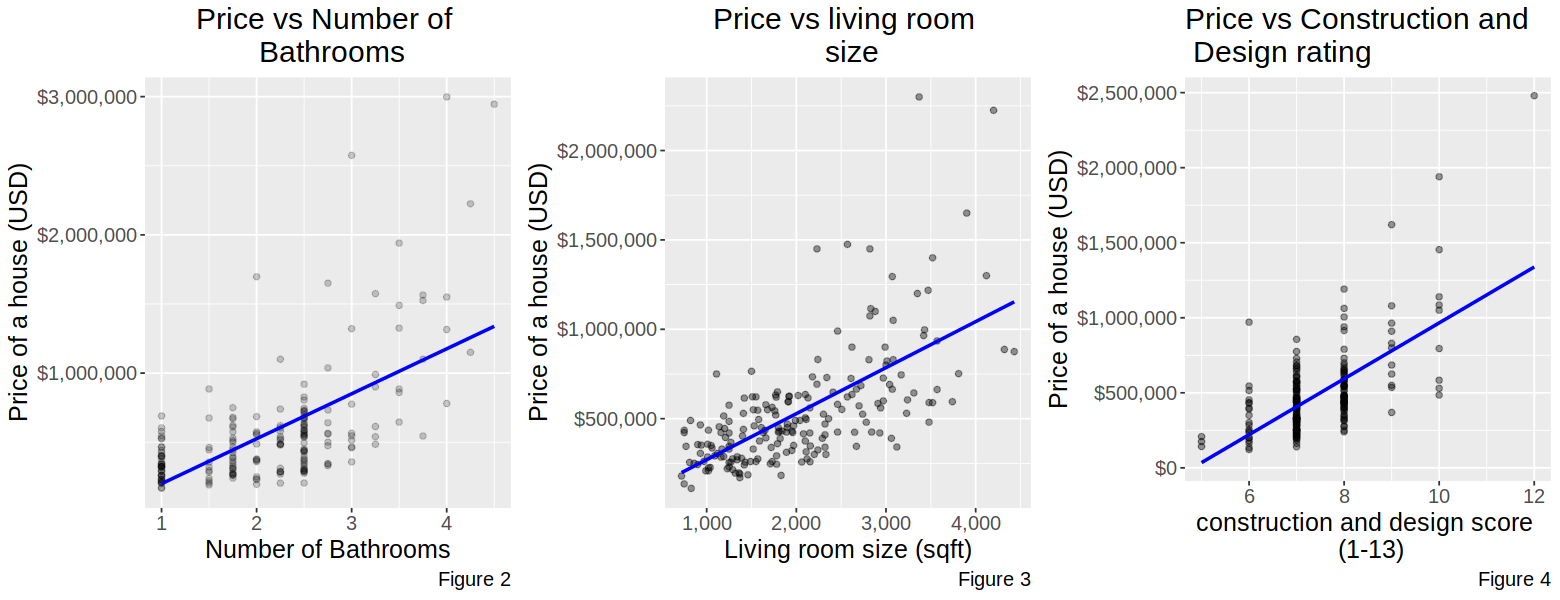

In [3]:
set.seed(69)
options(repr.plot.width=13, repr.plot.height=5)

#create a scatterplot to show the relationship between numbers of bathrooms and price
price_versus_bathrooms_plot <- housing_data |>
    sample_n(200)|>  #randomly sample 200 observations from a dataset
    ggplot(aes(x = bathrooms, y = price))+
        geom_point(alpha = 0.2)+  #modify color transparency to see the overlapping points
        labs(x = "Number of Bathrooms", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+   #convert numbers into a comma-separated format, enhancing the readability of the numeric values
        scale_y_continuous(labels = dollar_format()) + #convert the numeric values on the y-axis into a dollar amount
        ggtitle("Price vs Number of \n Bathrooms")+
        geom_smooth(method = "lm", se = FALSE, color = "blue", formula = y ~ x)+  #add a linear regression line to scatterplot
        labs(caption = "Figure 2")+
        theme(plot.title = element_text(hjust = 0.5))

#create a scatterplot to show the relationship between living room size and price
price_versus_size_plot <- housing_data |>
    sample_n(200)|>
    ggplot(aes(x = sqft_living, y = price))+
        geom_point(alpha = 0.4)+
        labs(x = "Living room size (sqft)", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+
        scale_y_continuous(labels = dollar_format()) +
        ggtitle("Price vs living room \n size")+
        geom_smooth(method = "lm", se = FALSE, color = "blue", formula = y ~ x)+
        labs(caption = "Figure 3")+
        theme(plot.title = element_text(hjust = 0.5))

#create a scatterplot to show the relationship between design and construction rating and price
price_versus_grade_plot <- housing_data |>
    sample_n(200)|>
    ggplot(aes(x = grade, y = price))+
        geom_point(alpha = 0.4)+
        labs(x = "construction and design score \n (1-13)", y = "Price of a house (USD)")+
        theme(text = element_text(size=15)) +
        scale_x_continuous(labels = scales::comma)+
        scale_y_continuous(labels = dollar_format()) +
        ggtitle("Price vs Construction and \n Design rating")+
        geom_smooth(method = "lm", se = FALSE, color = "blue", formula = y ~ x)+
        labs(caption = "Figure 4")
        theme(plot.title = element_text(hjust = 0.5))

grid.arrange(price_versus_bathrooms_plot, price_versus_size_plot, price_versus_grade_plot, ncol = 3) #arranging three plots side by side in a single row 

**Figure 2: Price vs Numbers of Bathrooms**\
Type of trend: Positive correlation between the house price and the number of bathrooms\
Good or Bad: Generally considered good in the real estate context, as more bathrooms might be associated with higher-quality or more luxurious homes

**Figure 3: Price vs Living Room Size**\
Type of trend: Positive correlation between the house price and the living room size\
Good or Bad: Typically considered good, as larger living spaces are often associated with higher-quality homes

**Figure 4: Price vs Construction and Design rating**\
Type of trend: Positive correlation between the house price and the construction and design rating\
Good or Bad: Generally considered good, as a higher design and construction rating implies better quality

**Why linear regression**\
Simplicity: Linear regression is a simple and well-established method. It is easy to understand, implement, and interpret. This simplicity can be advantageous, especially when the relationships are not highly complex.\
Interpretability: Linear regression provides clear and interpretable coefficients. Each coefficient in the linear regression equation has a specific meaning in terms of the impact on the response variable. In contrast, k-NN does not provide such direct interpretability.


### Linear regression


<br>
To begin our analysis, we will construct a model employing linear regression to forecast house prices, taking into account the predetermined variables. To accomplish this, we initially designate the chosen variables. Subsequently, we partition the data into testing and training sets, which will be utilized later to compute the accuracy of the model.

<br>
<br>

In [4]:
#split data into training and testing
set.seed(69)
housing <- housing_data |>
    select(-sqft_basement)

housing_split <- initial_split(housing, prop = 0.75, strata = price) #training data = 75%, testing data = 25%
housing_training <- training(housing_split)
housing_testing <- testing(housing_split)

<br>
Next, we construct the model by specifying linear regression as the engine and formulating a recipe based on the selected variables. Ultimately, we generate the model fit by utilizing the training data
<br>
<br>

In [5]:
#building the regression model
set.seed(69)
lm_spec <- linear_reg() |>
    set_engine("lm")|>
    set_mode("regression")

#create a recipe for predicting house prices using all variables
housing_recipe <- recipe(price ~ bathrooms+ sqft_living+ grade, data = housing_training) 

#builds housing prediction workflow, incorporating a housing recipe and linear regression model, then fits the model to the training data
housing_fit <- workflow()|>
    add_recipe(housing_recipe)|>
    add_model(lm_spec)|>
    fit(data = housing_training)
housing_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)    bathrooms  sqft_living        grade  
  -595222.4     -40663.9        172.6     113984.0  


<br>
Looking at the coefficients we can examine the fomula our model uses to determine the price of a house: <br>
<strong> Price = -$595222 + (172 * living room size) + (113983 * grade) - (40663 * number of bathrooms)</strong> <br>
<br>
Interestingly we note that the number of bathrooms in our model is negatively correlated with price, but intuitively we would expect the price of a home to increase if it had more bathrooms and our graph earlier had a positive correlation too. Perheps linear regression isn't the best method to use with our variables as there may be some error due to collinearity amongst the variables.
<br>
<br>
Regradless, here we continue with testing the model with the testing set and graph 100 random predictions against the actual price.


`geom_smooth()` using formula = 'y ~ x'


.metric .estimator .estimate   
1 rmse    standard   2.305930e+05
2 rsq     standard   4.985891e-01
3 mae     standard   1.648698e+05

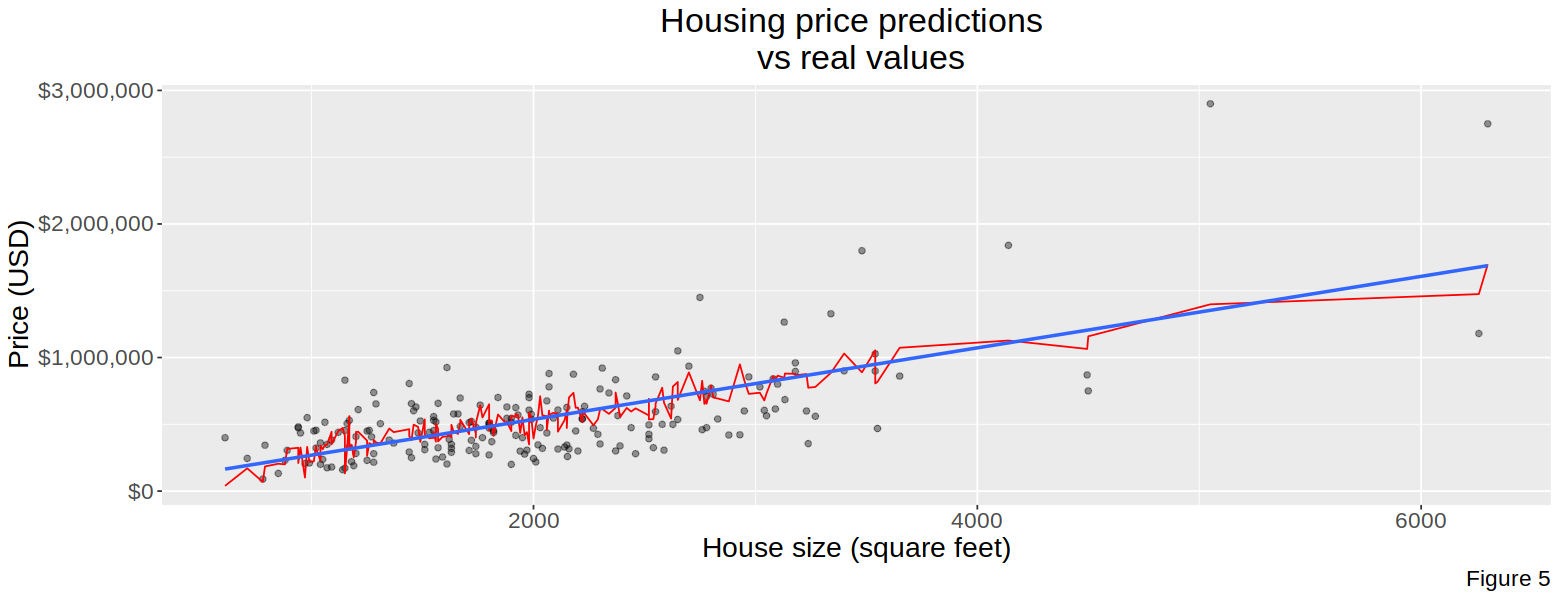

In [6]:
set.seed(69)

#applies model to test data, combines predictions with original variables.
lm_results <- housing_fit|>
    predict(housing_testing)|>
    bind_cols(housing_testing)

#computes metrics comparing predicted and actual house prices using lm_results.
lm_data <- lm_results |>
    metrics(truth = price, estimate = .pred)

#creates a tibble with sqft values ranging from the minimum to maximum.
sqft_prediction_grid <- tibble(
    sqft = c(
        housing |> select(sqft_living) |> min(),
        housing |> select(sqft_living) |> max()
    ))

#selects a random sample of 200 rows from lm_results.
lm_sample <- sample_n(lm_results, 200)

#create scatterplot with a red regression line and a blue best-fit line, showing the relationship between housing price predictions and the real values
lm_plot_final <- ggplot(lm_sample, aes(x = sqft_living, y = price)) +
  geom_point(alpha = 0.4) +
  geom_line(data = lm_sample,  #add a red regression line
            mapping = aes(x = sqft_living, y = .pred), 
            color = "red") +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) +
#  geom_smooth(method= "lm", se= FALSE)+ #add best-fit line in scatterplot --- since our linear regression uses multiple variables, the actual line wont be linear. not necessary to have a lobf
  labs(caption = "Figure 5")+
  theme(text = element_text(size = 17))+
  ggtitle("Housing price predictions \n vs real values")+
  theme(plot.title = element_text(hjust = 0.5))

lm_plot_final
lm_data

In [7]:
#note about RMSPE 
#note about accuracy based on actual graph, specifically consider the $3Mil houses and what our model predicted. for sqft does our model fall apart

## Discussion
summarize what you found

discuss whether this is what you expected to find?
yes the model is pretty grabage - RMSPE of $230k - talk about the meaning of RMSPE
potential errors: 
house prices fluctuate over time - interest rates could be a huge factor! https://fred.stlouisfed.org/series/MSPUS since 2020 house prices are up 30%
other factors play a role in price, such as neighborhood, the damn kitchen appliences, other variables in the dataset  

discuss what impact could such findings have?

discuss what future questions could this lead to?


## References

Brady, R. (2014). "The spatial diffusion of regional housing prices across U.S. states". Regional Science and Urban Economics, 46, 150–166. https://doi.org/10.1016/j.regsciurbeco.2014.04.003

Harlfoxem. (2016). “House sales in King County, USA”, Kaggle. https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

Sommers, P. & Carlson, D. (2000). “Ten Steps to a High Tech Future: The New Economy in Metropolitan Seattle”, The Brookings Institution Center on Urban and Metropolitan Affairs. https://www.brookings.edu/wp-content/uploads/2016/06/SommersReport.pdf

## K-nearest Neighbor Regression

In [8]:
#create tunning model to determine best K value for smallest RMSPE
housing_recipe <- recipe(price ~ ., data = housing_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

housing_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")


In [9]:
#Test model across vfolds and various K values
set.seed(69)
housing_vfold <- vfold_cv(housing_training, v = 5, strata = price)

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by = 2))

housing_results <- workflow() |>
    add_recipe(housing_recipe) |>
    add_model(housing_tune_spec)|>
    tune_grid(resamples = housing_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")|>
    filter(mean == min(mean))|>
    pull(neighbors)
housing_results

[1] 9

In [10]:
#Remake model based on best K and evaluate on test set
set.seed(69)
housing_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = housing_results) |>
  set_engine("kknn") |>
  set_mode("regression")

housing_fit <- workflow() |>
    add_recipe(housing_recipe)|>
    add_model(housing_spec)|>
    fit(housing_training)

housing_summary <- housing_fit |>
  predict(housing_testing) |>
  bind_cols(housing_testing) |>
  metrics(truth = price, estimate = .pred)|>
  filter(.metric == 'rmse')
housing_summary

.metric .estimator .estimate
1 rmse    standard   194419.2